In [14]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from IPython.display import display
from sympy import abc, Rational, init_printing, pi, sin

import checked_functions as c_f
import symbols as sym

init_printing()

# How does $\lambda$ vary with $\delta$?

We have the relationship:   

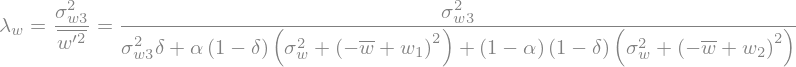

In [15]:
display(sp.Eq(sp.Eq(sym.lambda_w, c_f.lambda_w()), c_f.lambda_w().subs({sym.w_prime_2_bar: c_f.w_prime_2_bar()}),
              evaluate=False))

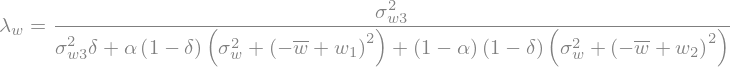

In [16]:
lambda_w_subs = c_f.lambda_w().subs({sym.w_prime_2_bar: c_f.w_prime_2_bar()})
display(sp.Eq(sym.lambda_w, lambda_w_subs))

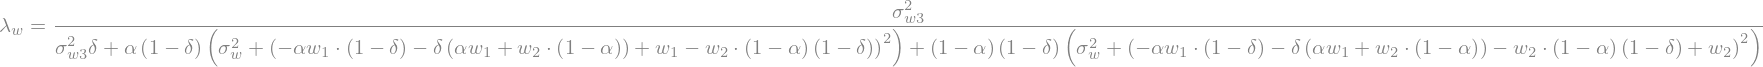

In [17]:
lambda_w_subs = lambda_w_subs.subs({sym.w_bar: c_f.w_bar()})
display(sp.Eq(sym.lambda_w, lambda_w_subs))

In [18]:
lambda_w_subs_func = sp.lambdify(
    [sym.sigma_w_3,
     sym.sigma_w,
     sp.abc.delta,
     sp.abc.alpha,
     sym.w_1, sym.w_2],
    lambda_w_subs)

We try to plot how the function would look like. 
For simplicity, we choose values for some parameters.

We also want to try the proposed fit in the document:

In [19]:
lambda_w_fit_1 = lambda const, delta, eps: (1 - const) * delta + const - eps
display(sp.Eq(sym.lambda_w, lambda_w_fit_1(sp.abc.c, sp.abc.delta, sp.abc.epsilon)))
lambda_w_fit_1 = sp.lambdify([sp.abc.c, sp.abc.delta, sp.abc.epsilon],
                             lambda_w_fit_1(sp.abc.c, sp.abc.delta, sp.abc.epsilon))

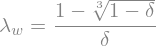

In [20]:
lambda_w_fit_2 = lambda delta: (1 - (1 - delta) ** Rational(1, 3)) / delta
display(sp.Eq(sym.lambda_w, lambda_w_fit_2(sp.abc.delta)))
lambda_w_fit_2 = sp.lambdify([sp.abc.delta], lambda_w_fit_2(sp.abc.delta))

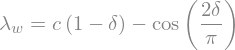

In [25]:
lambda_w_fit_3 = lambda delta, const: sin((2 / pi) * delta + (3 * pi / 2)) + (1 - delta) * const
display(sp.Eq(sym.lambda_w, lambda_w_fit_3(sp.abc.delta, sp.abc.c)))
lambda_w_fit_3 = sp.lambdify([sp.abc.delta, sp.abc.c], lambda_w_fit_3(sp.abc.delta, sp.abc.c))

In [26]:
epsilon = 1e-10
k = 1
w_1 = 5
w_2 = -2
sigma_w = 2
alphas = [.1, .5, .9]
deltas = np.linspace(start=0.01, stop=0.99, num=100)
sigma_w_3_s = [1, 2, 5]

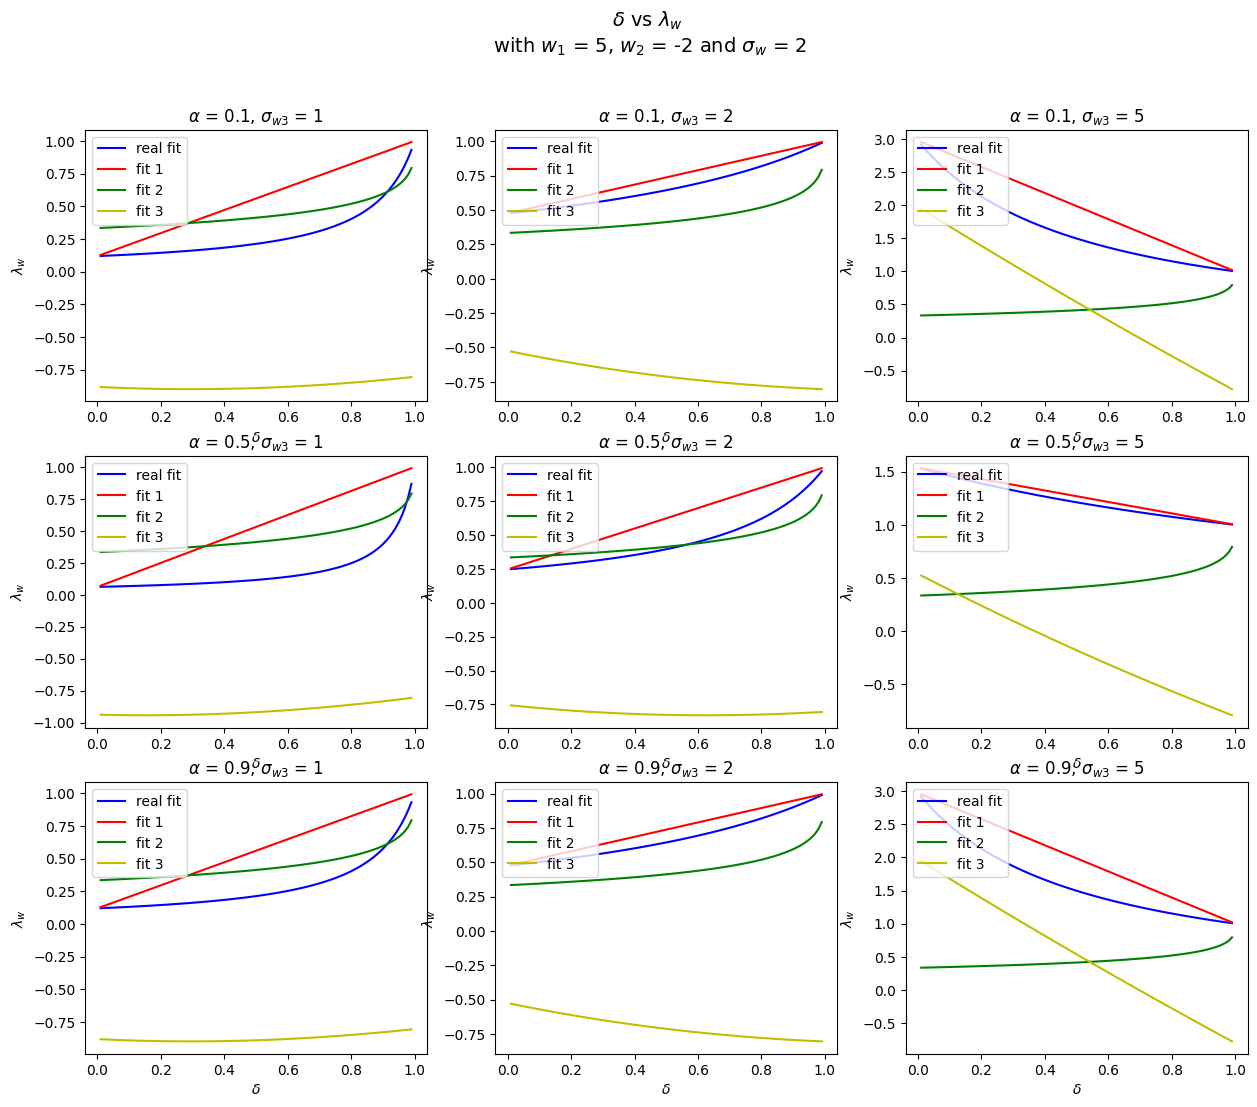

In [27]:
plt.figure(figsize=(15, 12))
plt.suptitle(f'$\\delta$ vs $\\lambda_w$ \n with $w_1$ = {w_1}, $w_2$ = {w_2} and $\\sigma_w$ = {sigma_w}', fontsize=14)

n = 1
for row, alpha in enumerate(alphas):
    for column, sigma_w_3 in enumerate(sigma_w_3_s):
        ax = plt.subplot(len(alphas), len(sigma_w_3_s), n)
        ax.set_title('$\\alpha$ = ' + str(alpha) + ', $\\sigma_{w3}$ = ' + str(sigma_w_3))
        ax.set_xlabel('$\\delta$')
        ax.set_ylabel('$\\lambda_w$')
        ax.plot(deltas, lambda_w_subs_func(sigma_w_3, sigma_w, deltas, alpha, w_1, w_2), label='real fit', color='b')
        c = lambda_w_subs_func(sigma_w_3, sigma_w, 0, alpha, w_1, w_2)
        ax.plot(deltas, lambda_w_fit_1(c, deltas, epsilon), label='fit 1', color='r')
        ax.plot(deltas, lambda_w_fit_2(deltas), label='fit 2', color='g')
        ax.plot(deltas, lambda_w_fit_3(deltas, c), label='fit 3', color='y')
        ax.legend(loc='upper left')
        n += 1

plt.show()